In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import pi


In [11]:
data = pd.read_csv(os.path.join('team_data.csv'))
data.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Golden State Warriors,82,240.6,42.8,85.1,0.503,11.3,28.9,0.391,...,0.815,8.4,35.1,43.5,29.3,8.0,7.5,15.5,19.6,113.5
1,2.0,Houston Rockets,82,240.9,38.7,84.2,0.460,15.3,42.3,0.362,...,0.781,9.0,34.5,43.5,21.5,8.5,4.8,13.8,19.5,112.4
2,3.0,New Orleans Pelicans,82,243.4,42.7,88.3,0.483,10.2,28.2,0.362,...,0.772,8.7,35.7,44.3,26.8,8.0,5.9,14.9,19.1,111.7
3,4.0,Toronto Raptors,82,241.8,41.3,87.4,0.472,11.8,33.0,0.358,...,0.794,9.8,34.2,44.0,24.3,7.6,6.1,13.4,21.7,111.7
4,5.0,Cleveland Cavaliers,82,240.6,40.4,84.8,0.476,12.0,32.1,0.372,...,0.779,8.5,33.7,42.1,23.4,7.1,3.8,13.7,18.6,110.9


In [41]:
df = data[["Team", "FG%", "3P%", "2P%", "FT%"]]
df.head()

,Team,FG%,3P%,2P%,FT%
0,Golden State Warriors,0.503,0.391,0.560,0.815
1,Houston Rockets,0.460,0.362,0.558,0.781
2,New Orleans Pelicans,0.483,0.362,0.540,0.772
3,Toronto Raptors,0.472,0.358,0.541,0.794
4,Cleveland Cavaliers,0.476,0.372,0.540,0.779


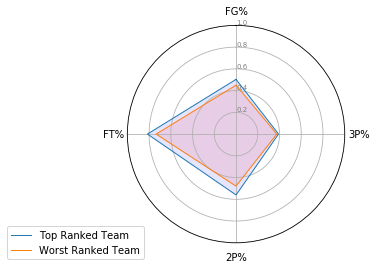

In [47]:
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=7)
plt.ylim(0,1)

# Ind1
values=df.loc[0].drop('Team').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Top Ranked Team")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[29].drop('Team').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Worst Ranked Team")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('shooting.png')

In [48]:
df2 = data[["Team", "DRB", "STL", "BLK", "PF"]]
df2.head()

,Team,DRB,STL,BLK,PF
0,Golden State Warriors,35.1,8.0,7.5,19.6
1,Houston Rockets,34.5,8.5,4.8,19.5
2,New Orleans Pelicans,35.7,8.0,5.9,19.1
3,Toronto Raptors,34.2,7.6,6.1,21.7
4,Cleveland Cavaliers,33.7,7.1,3.8,18.6


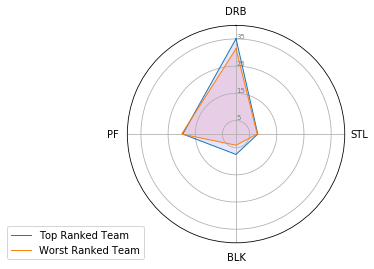

In [52]:
# number of variable
categories=list(df2)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,15,25,35,45], ["5","15","25","35","45"], color="grey", size=7)
plt.ylim(0,40)

# Ind1
values=df2.loc[0].drop('Team').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Top Ranked Team")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df2.loc[29].drop('Team').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Worst Ranked Team")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('defense.png')

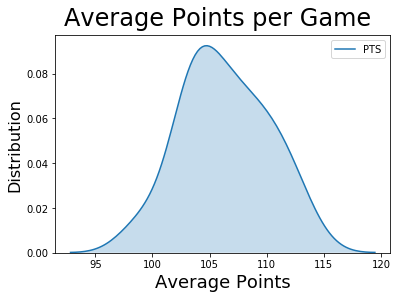

In [61]:
# library & dataset
import seaborn as sns
df3 = data[["PTS"]]
 
# density plot with shade
fig = sns.kdeplot(df3['PTS'], shade=True)
# sns.plt.show()
fig.figure.suptitle("Average Points per Game", fontsize = 24)

plt.xlabel('Average Points', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

plt.savefig('point_distribution.png')